In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [97]:
import pandas as pd

In [98]:
%cd '/content/drive/MyDrive/Colab Notebooks/AI+X'

/content/drive/MyDrive/Colab Notebooks/AI+X


In [99]:
file_path= '/content/drive/MyDrive/Colab Notebooks/AI+X/sub_data.csv'

In [100]:
data= pd.read_csv(file_path, encoding='utf-8') 

In [101]:
data

,Unnamed: 0,연도,월,요일,노선명,전염병,승하차총승객수
0,0,2015,1,1,1,0,1523784.0
1,1,2015,1,1,2,0,7470992.0
2,2,2015,1,1,3,0,2751049.0
3,3,2015,1,1,4,0,3127658.0
4,4,2015,1,1,5,0,2695204.0
...,...,...,...,...,...,...,...
5224,14124,2021,12,7,5,1,4733429.0
5225,14125,2021,12,7,6,1,2348515.0
5226,14126,2021,12,7,7,1,5170089.0
5227,14127,2021,12,7,8,1,1403314.0


In [102]:
corr_matrix = data.corr()

corr_matrix["승하차총승객수"].sort_values(ascending=False)

승하차총승객수       1.000000
요일            0.180039
월             0.016552
Unnamed: 0   -0.132754
연도           -0.136911
전염병          -0.155916
노선명          -0.400781
Name: 승하차총승객수, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split

X= data[['월', '요일', '노선명', '전염병']]
y= data['승하차총승객수']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['연도'], y, alpha=0.4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['월'], y, alpha=0.4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['요일'], y, alpha=0.4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data['노선명'], y, alpha=0.4)
plt.show()

In [104]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
y_pred = model.predict([[1, 3, 5, 0]]) # 예측 값
print(y_pred)

[4448120.73539414]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [108]:
print("가중치(계수, 기울기 파라미터 W) :", model.coef_)
print("편향(절편 파라미터 b) :", model.intercept_)

가중치(계수, 기울기 파라미터 W) : [   27867.97256336   303412.18474252  -544118.08737274 -1173894.87473275]
편향(절편 파라미터 b) : 6230606.645466919


In [91]:
# a1, a2, a3, a4, a5= model.coef_
a1, a2, a3, a4= model.coef_
b= model.intercept_

In [92]:
# formular= str(a1) + ' x1 + ' + str(a2) + ' x2 + ' + str(a3) + ' x3 + ' + str(a4) + ' x4 + ' + str(a5) + ' x5 + ' + str(b)
formular= str(a1) + ' x1 + ' + str(a2) + ' x2 + ' + str(a3) + ' x3 + ' + str(a4) + ' x4 + ' + str(b)
# [[x1: '연도', x2: '월', x3: '요일', x4: '노선명', x5: '전염병']]

In [93]:
print(formular)

17879.34540153478 x1 + -151037.3646867182 x2 + -247868.38396656906 x3 + -591767.8189355719 x4 + 6257397.132469678


In [111]:
print("훈련세트 점수: {:.2f}".format( model.score(X_train, y_train) ))
print("테스트세트 점수: {:.2f}".format( model.score(X_test, y_test) ))

훈련세트 점수: 0.22
테스트세트 점수: 0.20


In [112]:
y_predict = model.predict(X_test)

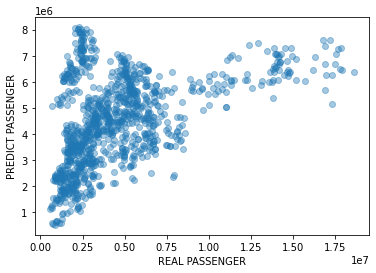

In [113]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("REAL PASSENGER")
plt.ylabel("PREDICT PASSENGER")
plt.show()

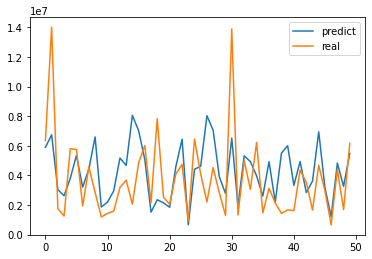

In [115]:
plt.plot(model.predict(X_test[:50]), label="predict")
plt.plot(y_test[:50].values.reshape(-1, 1), label="real")
plt.legend()

In [118]:
print(model.score(X_train, y_train))

0.2215359670979813
